<a href="https://colab.research.google.com/github/crismunoz/Fuzzy-Logic/blob/master/FL_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install  scikit-fuzzy

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=7a548b35ecba38c65df74ec14b20e7424ebb995eb902b9c8448534372697627e
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


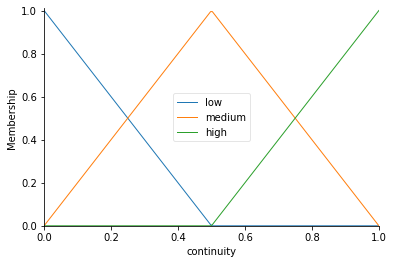

In [56]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

continuity = ctrl.Antecedent(np.linspace(0, 1, 200), 'continuity')
continuity.automf(names=['low','medium','high'])
#continuity['low'] = fuzz.trimf(continuity.universe, [0, 0, 0.5])
#continuity['medium'] = fuzz.trimf(continuity.universe, [0, 0.5, 1])
#continuity['high'] = fuzz.trimf(continuity.universe, [0.5, 1, 1])
continuity.view()

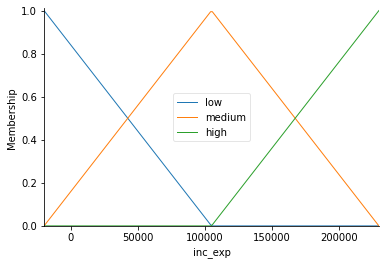

In [55]:
inc_exp = ctrl.Antecedent(np.linspace(-20000, 230000, 200), 'inc_exp')
inc_exp.automf(names=['low','medium','high'])
#inc_exp['low'] = fuzz.trimf(inc_exp.universe, [-20000, -20000, 50000])
#inc_exp['medium'] = fuzz.trimf(inc_exp.universe, [-20000, 50000, 150000])
#inc_exp['high'] = fuzz.trimf(inc_exp.universe, [50000, 150000, 230000])
inc_exp.view()

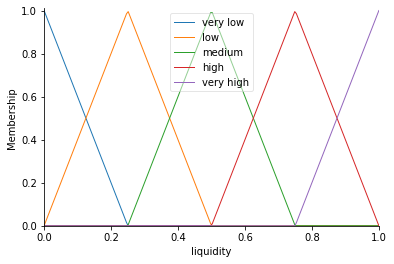

In [59]:
liquidity = ctrl.Consequent(np.linspace(0, 1, 200), 'liquidity')
liquidity.automf(names=['very low','low','medium','high','very high'])
#liquidity['very low'] = fuzz.trimf(liquidity.universe, [0, 0, 0.25])
#liquidity['low'] = fuzz.trimf(liquidity.universe, [0, 0.25, 0.5])
#liquidity['medium'] = fuzz.trimf(liquidity.universe, [0.25, 0.5, 0.75])
#liquidity['high'] = fuzz.trimf(liquidity.universe, [0.5, 0.75, 1])
#liquidity['very high'] = fuzz.trimf(liquidity.universe, [0.75, 1, 1])
liquidity.view()

In [38]:
rule1 = ctrl.Rule(                        inc_exp['low']   , liquidity['very low'])
rule2 = ctrl.Rule( continuity['low']    & inc_exp['medium'], liquidity['low'])
rule3 = ctrl.Rule( continuity['medium'] & inc_exp['medium'], liquidity['medium'])
rule4 = ctrl.Rule( continuity['high']   & inc_exp['medium'], liquidity['high'])
rule5 = ctrl.Rule( continuity['low']    & inc_exp['high']  , liquidity['medium'])
rule6 = ctrl.Rule( continuity['medium'] & inc_exp['high']  , liquidity['high'])
rule7 = ctrl.Rule( continuity['high']   & inc_exp['high']  , liquidity['very high'])

credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
credit= ctrl.ControlSystemSimulation(credit_ctrl)

In [39]:
credit.input['continuity'] = 0
credit.input['inc_exp'] = 0
credit.compute()
print(credit.output['liquidity'])
liquidity.view(sim=credit)